First 5 rows:
   Size  Location  Number of Rooms   Price
0  1200     urban                3  150000
1  1500  suburban                4  175000
2   800     rural                2   90000
3   950     urban                2  110000
4  2000  suburban                5  220000

Dataset Informaton:
   Size  Location  Number of Rooms   Price
0  1200     urban                3  150000
1  1500  suburban                4  175000
2   800     rural                2   90000
3   950     urban                2  110000
4  2000  suburban                5  220000

Missing Values:
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64
Datasett after encodeing:
   Size  Number of Rooms     Price  Location_suburban  Location_urban
0  1200                3  150000.0              False            True
1  1500                4  175000.0               True           False
2   800                2   90000.0              False           False
3   950                2  110

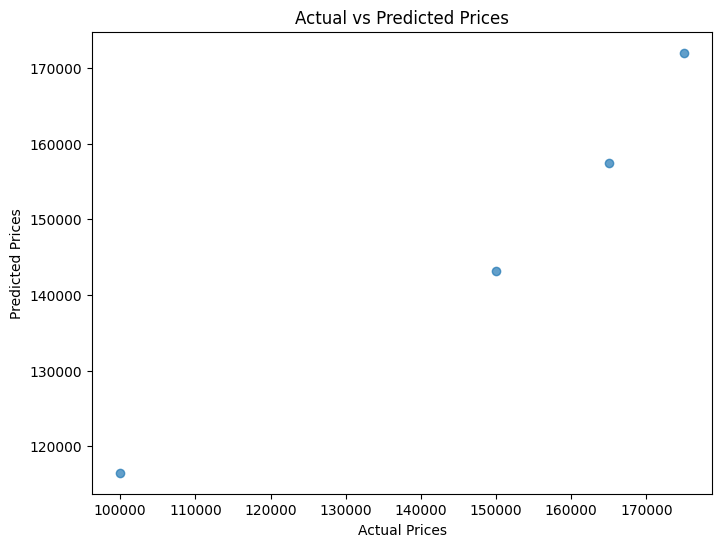

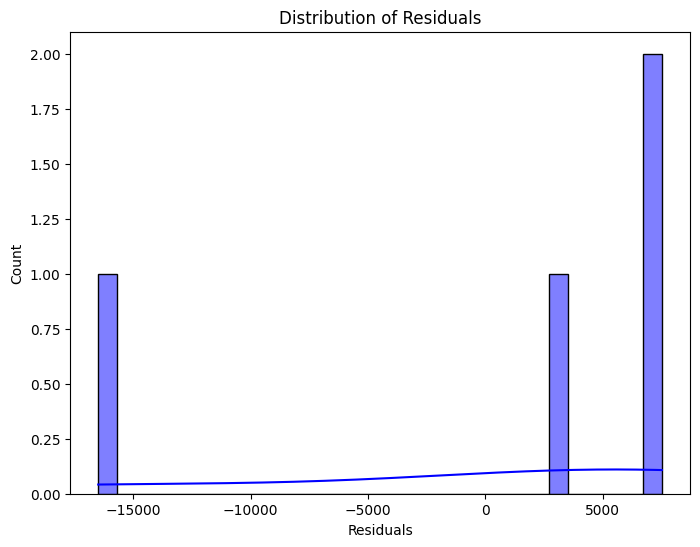

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data=pd.read_csv('house_prices.csv')
print("First 5 rows:")
print(data.head())

print("\nDataset Informaton:")
print(data.head())

print("\nMissing Values:")
print(data.isnull().sum())

data['Size'] = data['Size'].fillna(data['Size'].median())
data['Number of Rooms'] = data['Number of Rooms'].fillna(data['Number of Rooms'].median())

upper_limit = data['Price'].quantile(0.95)
data['Price'] = np.where(data['Price'] > upper_limit, upper_limit, data['Price'])

data = pd.get_dummies(data, columns=['Location'], drop_first=True)
print("Datasett after encodeing:")
print(data.head())

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Size', 'Number of rooms']] = scaler.fit_transform(data[['Size', 'Number of Rooms']])

X = data.drop('Price' , axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()
